In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ROOT_DIR = "data"
os.listdir(ROOT_DIR)

['videocall-tencent_20250421203000_00005.csv',
 'streaming-netflix_20250421181000_00003.csv',
 'streaming-netflix_20250419191000_00002.csv',
 'videocall-wechat_20250314203000_00002.csv',
 'streaming-youtube_20250305102412_00001.csv',
 'streaming-netflix_20250421182000_00004.csv',
 'streaming-youtube_20250305103000_00002.csv',
 'streaming-netflix_20250421175315_00001.csv',
 'streaming-bilibili_20250315185000_00003.csv',
 'remoteserv-colab_20250226160157_00001.csv',
 'videocall-tencent_20250421195324_00001.csv',
 'streaming-youtube_20250215182000_00002.csv',
 'remoteserv-roboflow_20250215175000_00002.csv',
 'videocall-tencent_20250421202000_00004.csv',
 'streaming-bilibili_20250315184000_00002.csv',
 'remoteserv-colab_20250226193000_00002.csv',
 'streaming-netflix_20250419192000_00003.csv',
 'streaming-netflix_20250421184000_00006.csv',
 'remoteserv-colab_20250222131743_00002.csv',
 'remoteserv-colab_20250226161000_00002.csv',
 'streaming-netflix_20250419194000_00005.csv',
 'videocall-te

In [4]:
file_of_interest = os.path.join(ROOT_DIR, os.listdir(ROOT_DIR)[0])
df = pd.read_csv(file_of_interest)
df

,src_addr,dst_addr,sport,dport,src2dst_pkts,dst2src_pkts,src2dst_bytes,dst2src_bytes,duration,num_syn,...,window_avg,src2dst_window_avg,dst2src_window_avg,num_raw_tcp,num_tls,tls_vers,tls_handshake_duration,num_retransmission,num_outoforder,num_duplicate_ack
0,192.168.1.13,134.224.240.221,49807,443,37,33,5502,4708,391.03400,0,...,138,253,9,0,37,[2],0.000000,0,0,23
1,192.168.1.13,170.114.1.181,49784,443,20,10,1360,780,361.43300,0,...,171,252,9,0,20,[2],0.000000,0,0,9
2,192.168.1.13,43.153.249.181,51080,443,106,154,116917,25956,381.96100,0,...,777,1012,616,0,105,[2],0.000000,0,0,60
3,192.168.1.13,170.114.52.83,50970,443,26,25,1428,1350,364.82400,0,...,131,250,9,0,1,[2],0.000000,0,0,0
4,192.168.1.13,52.96.109.146,49684,443,13,13,702,1131,360.01300,0,...,8700,1020,16380,0,13,[2],0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,192.168.1.13,162.14.17.232,51148,443,11,12,3177,5846,1.43373,2,...,6292,6817,5812,2,7,[0;2],0.252302,0,0,4
77,192.168.1.13,162.14.17.232,51149,443,11,11,2898,5898,1.93460,2,...,6556,6816,6295,2,6,[0;2],0.260793,0,0,4
78,192.168.1.13,162.14.17.232,51150,443,11,12,3009,5283,1.59549,2,...,6293,6817,5812,2,7,[0;2],0.259919,0,0,4
79,192.168.1.13,129.226.103.131,51151,443,10,10,2005,6193,2.14234,2,...,7136,7398,6874,2,6,[0;2],0.231894,0,0,4


In [5]:
df.columns

Index(['src_addr', 'dst_addr', 'sport', 'dport', 'src2dst_pkts',
       'dst2src_pkts', 'src2dst_bytes', 'dst2src_bytes', 'duration', 'num_syn',
       'num_ack', 'num_rst', 'num_fin', 'syn_reqs', 'syn_acks', 'ack_affs',
       'handshake_duration', 'avg_tput', 'src2dst_tput', 'dst2src_tput',
       'rtt_avg', 'src2dst_rtt_avg', 'dst2src_rtt_avg', 'src2dst_rtt_std',
       'dst2src_rtt_std', 'window_avg', 'src2dst_window_avg',
       'dst2src_window_avg', 'num_raw_tcp', 'num_tls', 'tls_vers',
       'tls_handshake_duration', 'num_retransmission', 'num_outoforder',
       'num_duplicate_ack'],
      dtype='object')

## Get PDF/CDF plots

### On Round-Trip Time

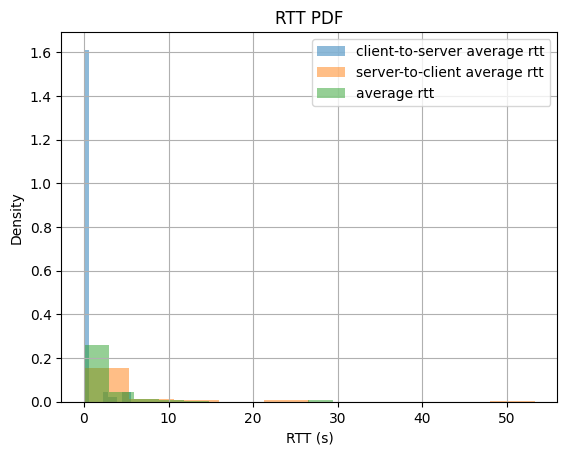

In [6]:
plt.hist(list(df['src2dst_rtt_avg']), density=True, alpha=0.5, label='client-to-server average rtt')
plt.hist(list(df['dst2src_rtt_avg']), density=True, alpha=0.5, label='server-to-client average rtt')
plt.hist(list(df['rtt_avg']), density=True, alpha=0.5, label='average rtt')

plt.xlabel("RTT (s)")
plt.ylabel("Density")
plt.title("RTT PDF")
plt.legend()
plt.grid(True)
plt.show()

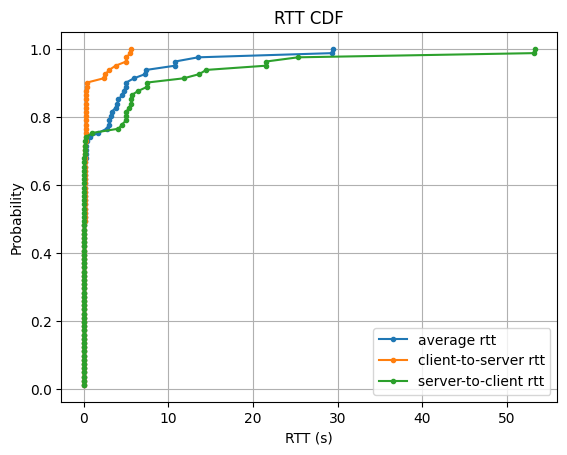

In [7]:
sorted_rtt = np.sort(list(df['rtt_avg']))
sorted_c2s_rtt = np.sort(list(df['src2dst_rtt_avg']))
sorted_s2c_rtt = np.sort(list(df['dst2src_rtt_avg']))
cdf = np.arange(1, len(sorted_rtt) + 1) / len(sorted_rtt)
plt.plot(sorted_rtt, cdf, marker='.', linestyle='-', label='average rtt')
c2s_cdf = np.arange(1, len(sorted_c2s_rtt) + 1) / len(sorted_c2s_rtt)
plt.plot(sorted_c2s_rtt, c2s_cdf, marker='.', linestyle='-', label='client-to-server rtt')
s2c_cdf = np.arange(1, len(sorted_s2c_rtt) + 1) / len(sorted_c2s_rtt)
plt.plot(sorted_s2c_rtt, s2c_cdf, marker='.', linestyle='-', label='server-to-client rtt')
# plt.xscale("log")
# plt.xlabel("RTT (s) [log scale]")
plt.xlabel("RTT (s)")
plt.ylabel("Probability")
plt.title("RTT CDF")
plt.legend()
plt.grid(True)
plt.show()

### On Window Size

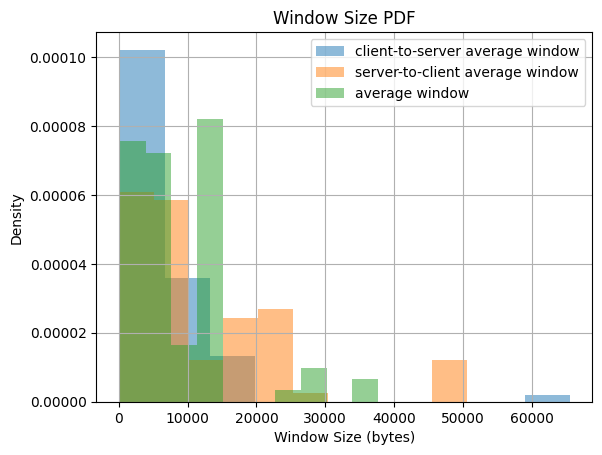

In [8]:
plt.hist(list(df['src2dst_window_avg']), density=True, alpha=0.5, label='client-to-server average window')
plt.hist(list(df['dst2src_window_avg']), density=True, alpha=0.5, label='server-to-client average window')
plt.hist(list(df['window_avg']), density=True, alpha=0.5, label='average window')

plt.xlabel("Window Size (bytes)")
plt.ylabel("Density")
plt.title("Window Size PDF")
plt.legend()
plt.grid(True)
plt.show()

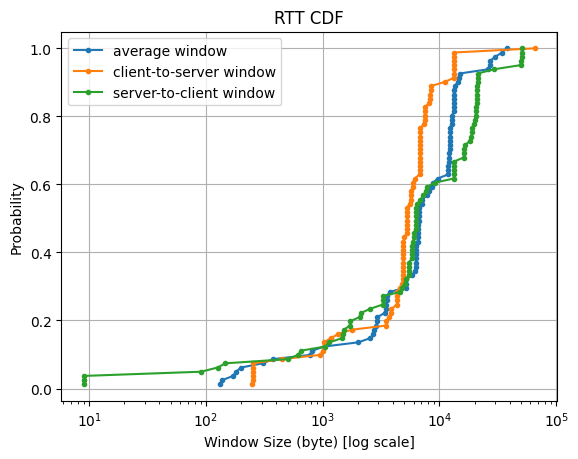

In [9]:
sorted_win = np.sort(list(df['window_avg']))
sorted_c2s_win = np.sort(list(df['src2dst_window_avg']))
sorted_s2c_win = np.sort(list(df['dst2src_window_avg']))
cdf = np.arange(1, len(sorted_win) + 1) / len(sorted_win)
plt.plot(sorted_win, cdf, marker='.', linestyle='-', label='average window')
c2s_cdf = np.arange(1, len(sorted_c2s_win) + 1) / len(sorted_c2s_win)
plt.plot(sorted_c2s_win, c2s_cdf, marker='.', linestyle='-', label='client-to-server window')
s2c_cdf = np.arange(1, len(sorted_s2c_win) + 1) / len(sorted_c2s_win)
plt.plot(sorted_s2c_win, s2c_cdf, marker='.', linestyle='-', label='server-to-client window')
plt.xscale("log")
plt.xlabel("Window Size (byte) [log scale]")
# plt.xlabel("Window Size (byte)")
plt.ylabel("Probability")
plt.title("RTT CDF")
plt.legend()
plt.grid(True)
plt.show()

### On Handshake Duration

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


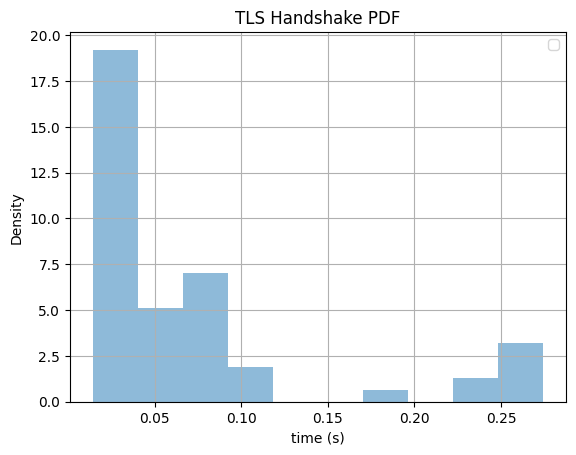

In [12]:
plt.hist(list(df[df['tls_handshake_duration'] > 0.0]['tls_handshake_duration']), density=True, alpha=0.5)

plt.xlabel("time (s)")
plt.ylabel("Density")
plt.title("TLS Handshake PDF")
plt.legend()
plt.grid(True)
plt.show()